In [1]:
%pylab inline
%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
import arviz as az
import gbfit # To have access to waveform tools; this is safe to import as a module
from kde_contour import kdeplot_2d_clevels
import pandas as pd
import seaborn as sns
import warnings

sns.set_context('notebook')
sns.set_palette('colorblind')
sns.set_style('ticks')

In [3]:
fit = az.from_netcdf('testinj.nc')
inj = genfromtxt('testinj.dat', names=True)

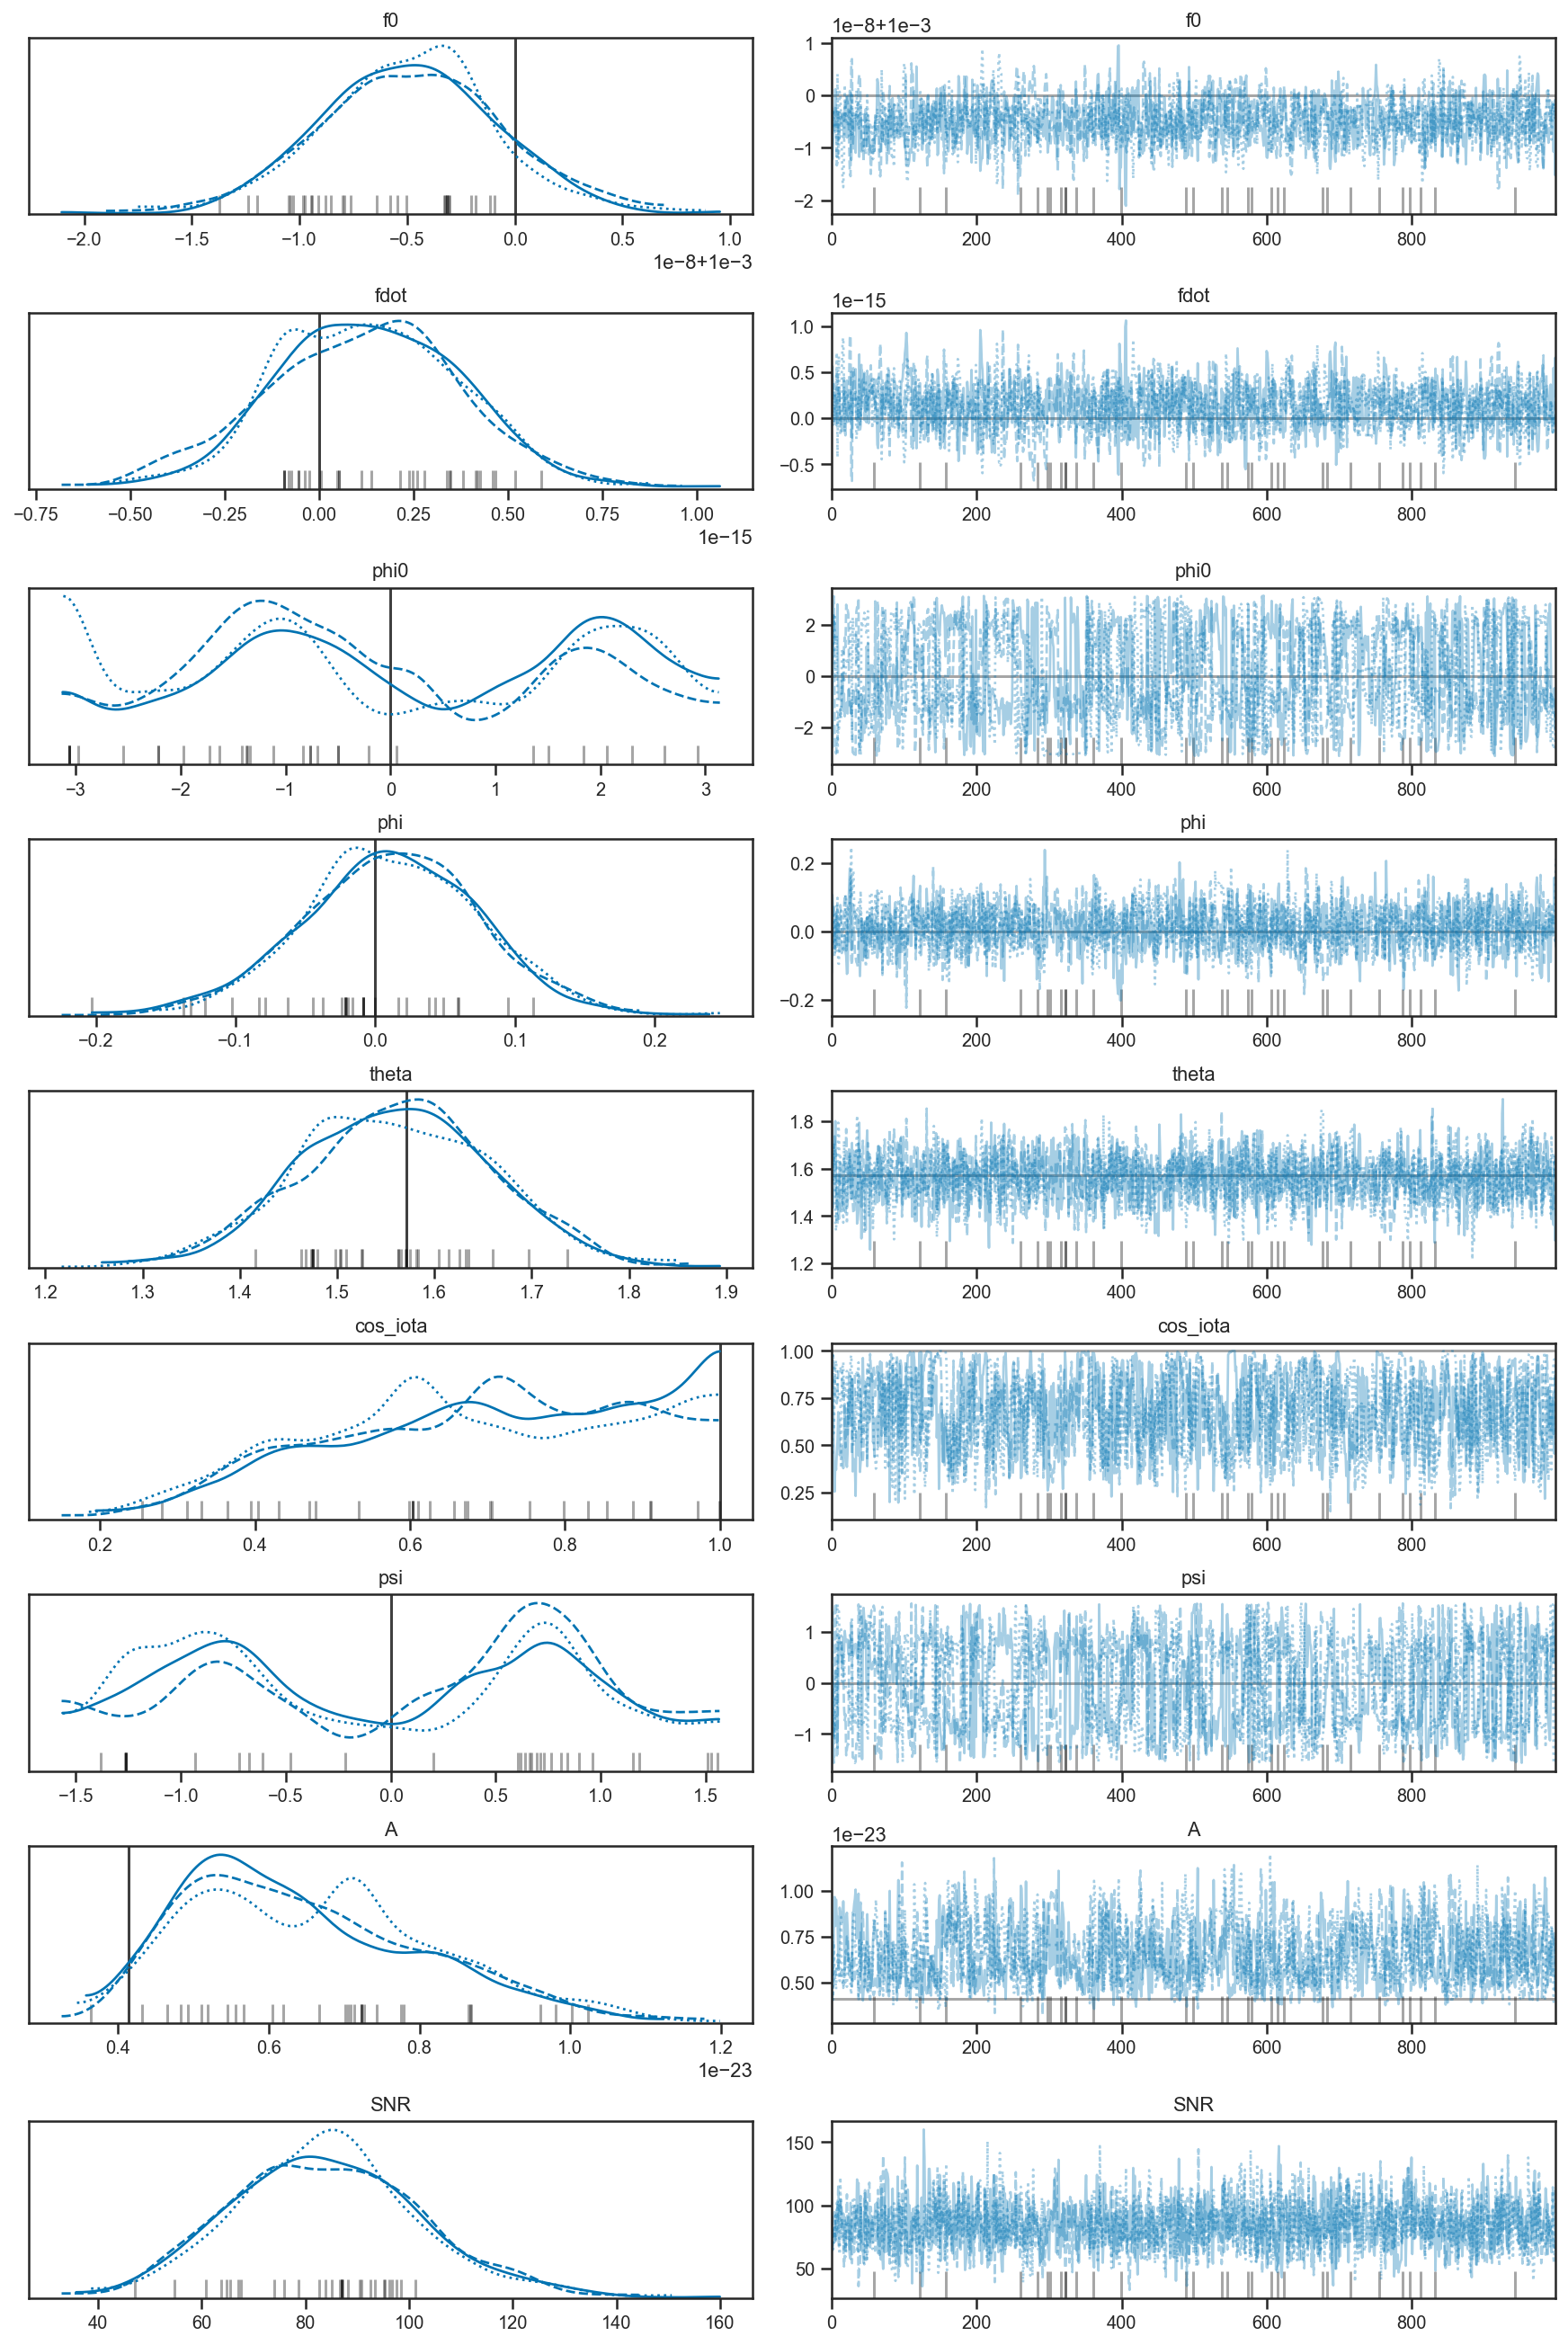

In [4]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    az.plot_trace(fit, compact=True, var_names=['f0', 'fdot', 'phi0', 'phi', 'theta', 'cos_iota', 'psi', 'A', 'SNR'],
                  lines=(('f0', {}, inj['f0']),
                         ('fdot', {}, inj['fdot']),
                         ('phi0', {}, inj['phi0']),
                         ('phi', {}, inj['phi']),
                         ('theta', {}, inj['theta']),
                         ('cos_iota', {}, inj['cos_iota']),
                         ('psi', {}, inj['psi']),
                         ('A', {}, inj['A'])))

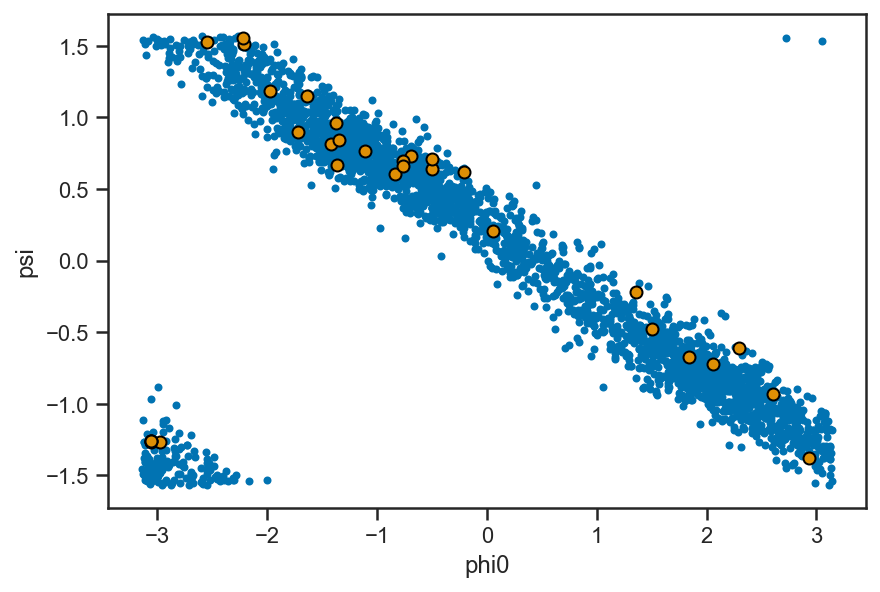

In [5]:
az.plot_pair(fit, var_names=['phi0', 'psi'], divergences=True)

The best-measured frequency is actually the frequency at the midpoint in time (approximately); this is de-correlated with the $\dot{f}$ parameter, so that's what we sample in:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x129d55c10>,
      dtype=object)

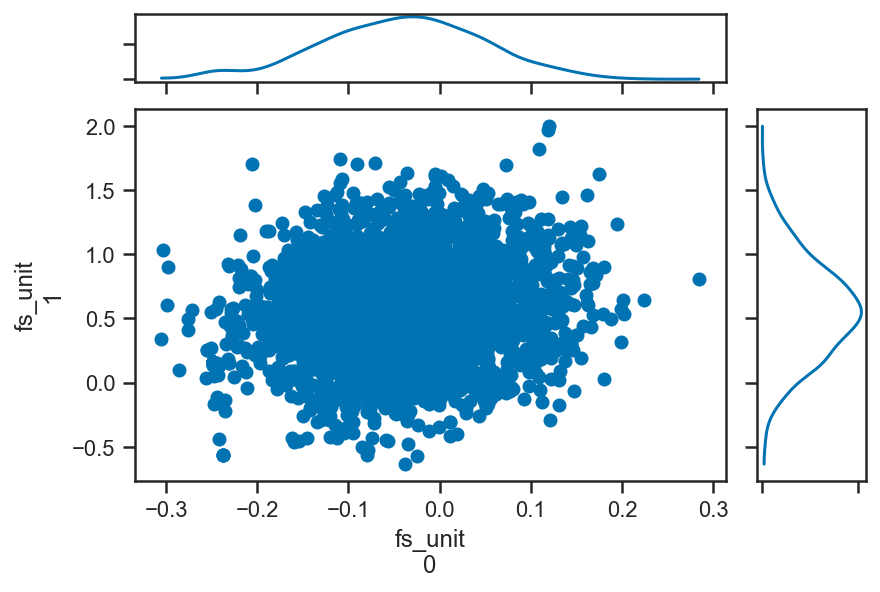

In [6]:
az.plot_joint(fit, var_names=['fs_unit'], coords={'fs_unit_dim_0': [0, 1]})

/Users/wfarr/Code/GBPyro/kde_contour.py:28: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  ax.contour(XS, YS, ZS, levels=l, **kwargs)


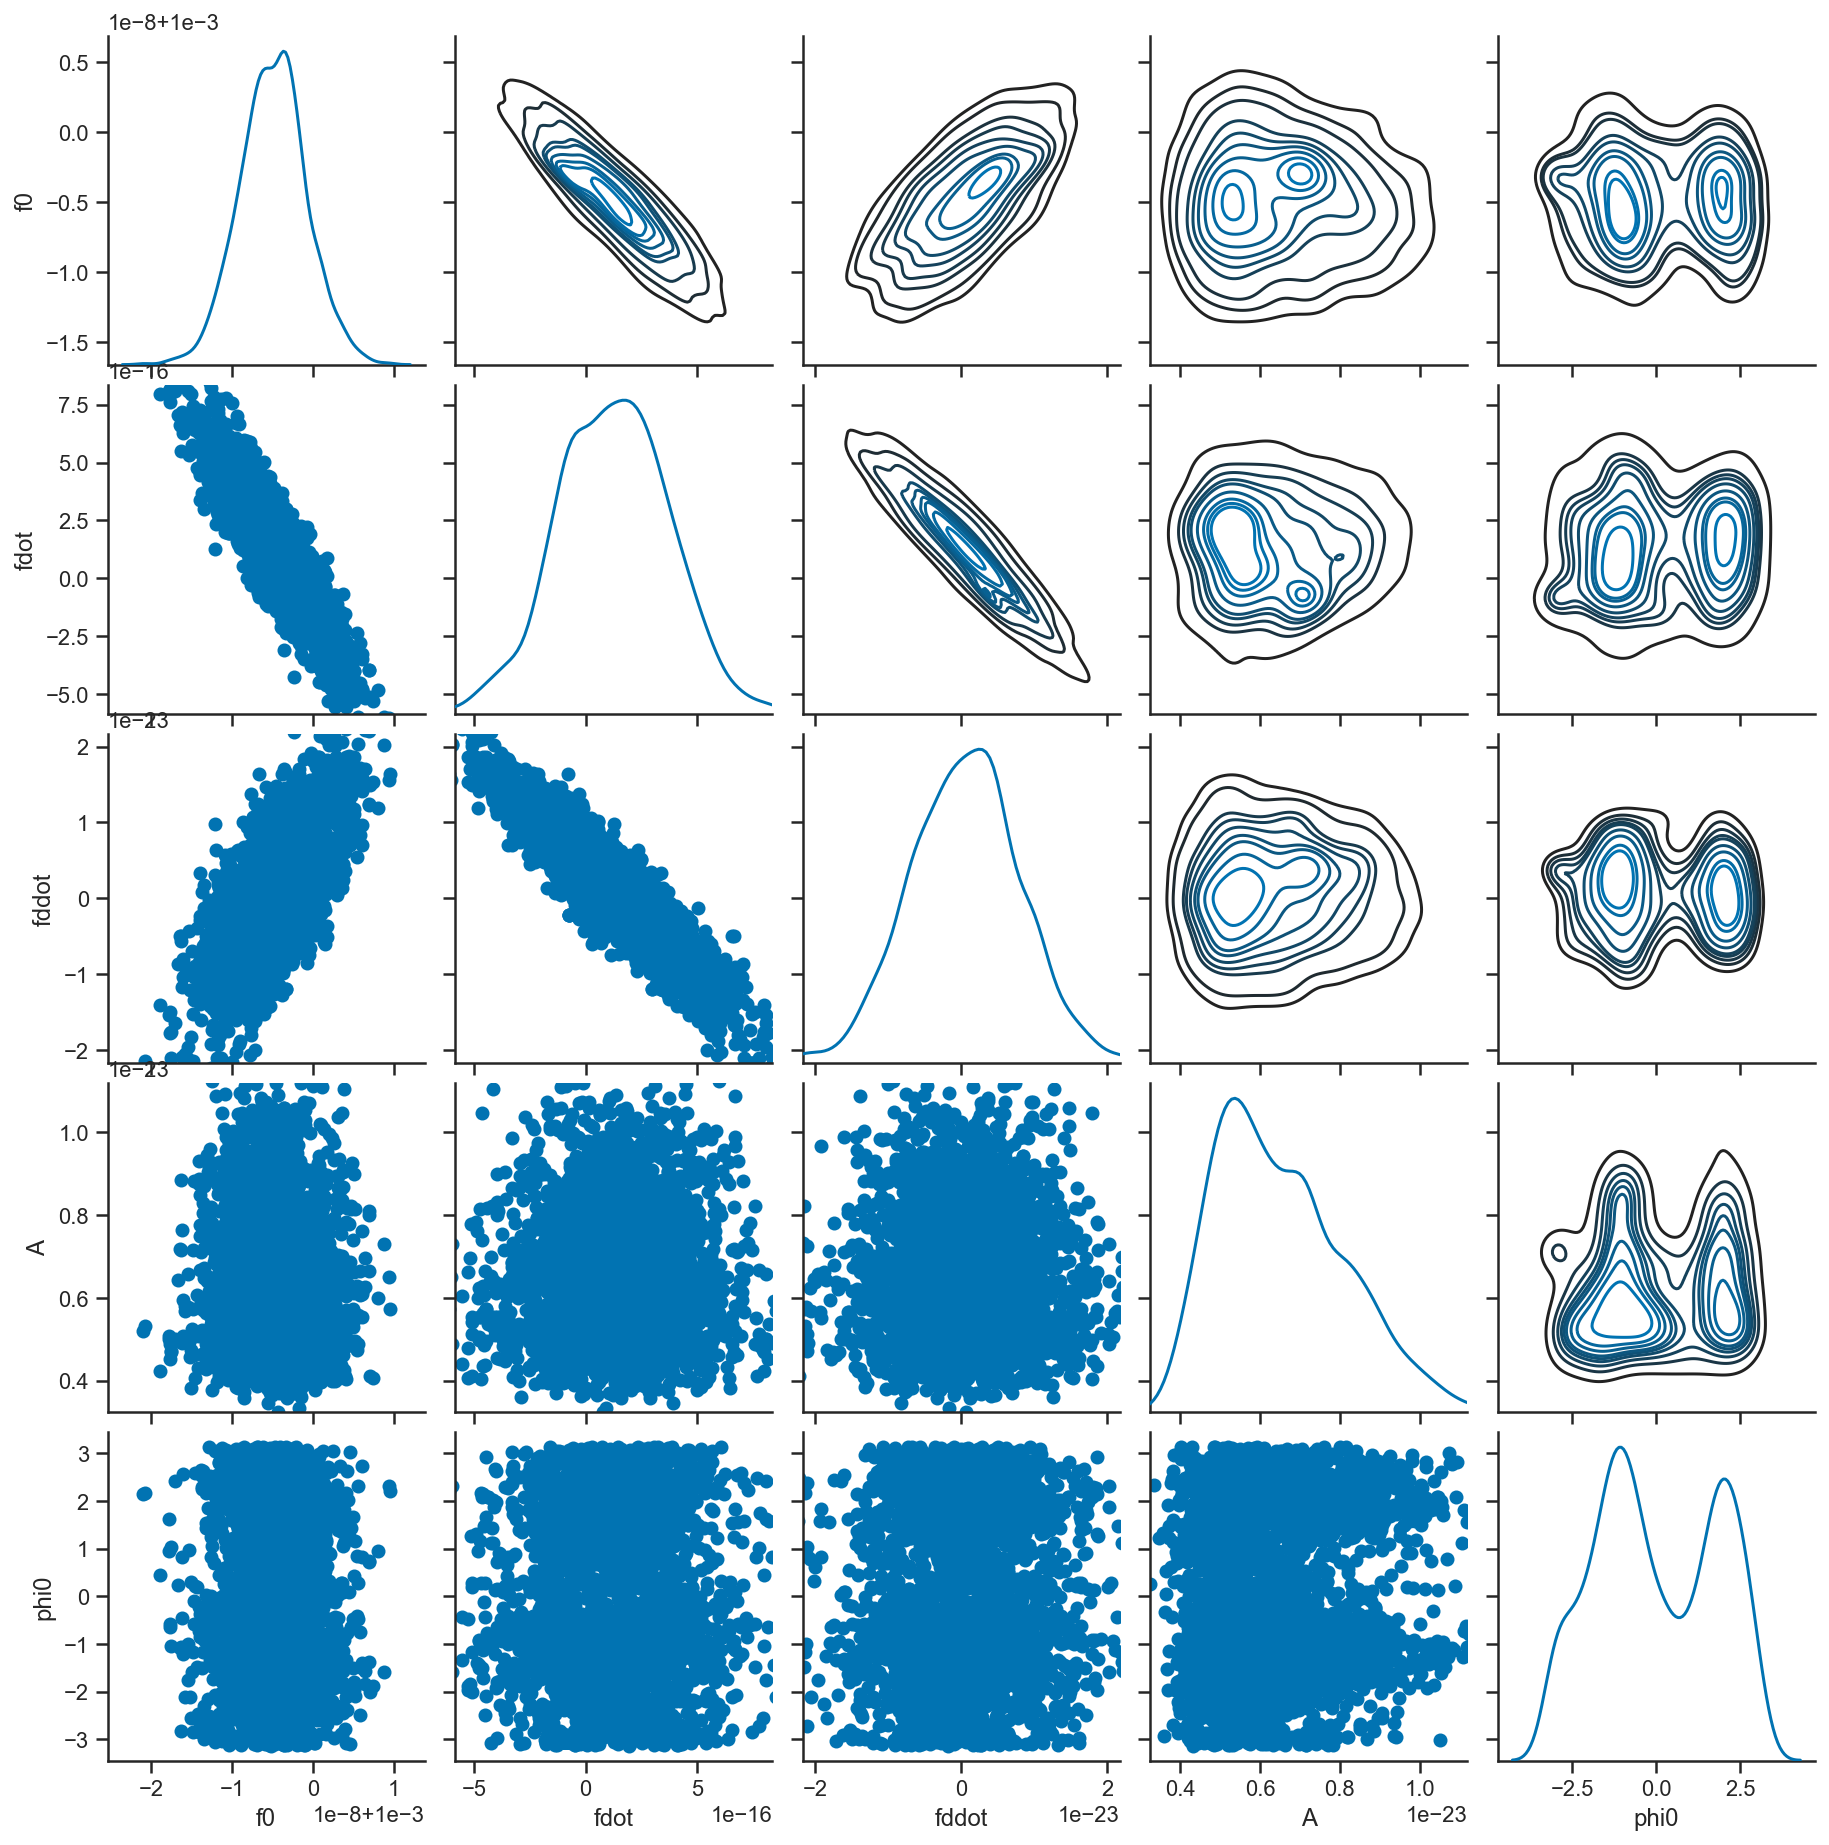

In [7]:
m = {}
for k in ['f0', 'fdot', 'fddot', 'A', 'phi0']:
    m[k] = fit.posterior[k].values.flatten()
df = pd.DataFrame(m)
g = sns.PairGrid(df, diag_sharey=False)
g.map_diag(sns.kdeplot)
g.map_upper(kdeplot_2d_clevels)
g.map_lower(scatter)